In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
df=pd.read_csv('USA_Housing.csv')


In [8]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
df=df.drop(['Address'],axis=1)

In [10]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [ ]:
#we dont have any null values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
# we have all the value is numeric format.

In [13]:
#visualizaiton

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


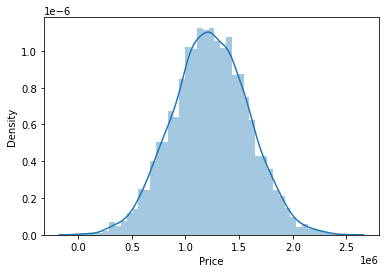

In [14]:
import seaborn as sns
sns.distplot(df.Price)

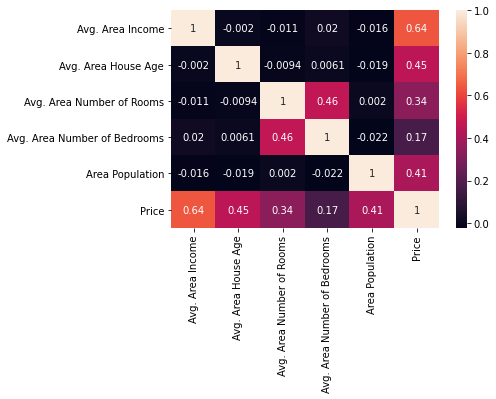

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
#we have less correlation between features

In [ ]:
#Prepare our dataset

In [17]:
X=df.drop(['Price'],axis=1)

In [18]:
y=df.Price

In [19]:
#Lets Split our dataset into train and test after all we have to teach and assess our Pupil(Model)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=4,)

In [21]:
#Let's Rescale our Dataset because values are imbalanced

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [23]:
pipeline=Pipeline([('std_scalar', StandardScaler())])
X_train=pipeline.fit_transform(X_train)
X_test=pipeline.fit_transform(X_test)

In [24]:
#Let's Build our model. Till now Our dataset is refined to be trained.

In [25]:
#Logistic Regression
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [26]:
print (lin_reg.intercept_)
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient']) #creating a dataframe for coeficients.
coeff_df

1230782.0625244325


,Coefficient
Avg. Area Income,230469.998671
Avg. Area House Age,165223.037971
Avg. Area Number of Rooms,118688.566014
Avg. Area Number of Bedrooms,2704.548885
Area Population,152074.758318


In [27]:
#Let' test Our Model by predicting from our test data

In [28]:
pred=lin_reg.predict(X_test)

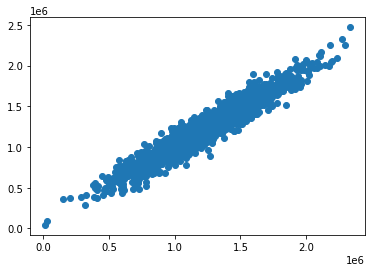

In [29]:
plt.scatter(y_test,pred)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


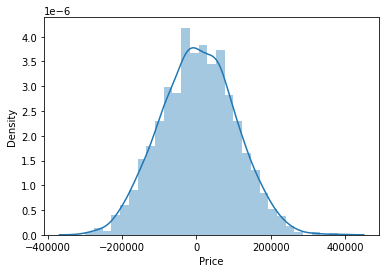

In [30]:
sns.distplot((y_test-pred))

In [31]:
#Regression Evalution Metrics

In [32]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [38]:
def eval(y_test, pred):
  MAE=metrics.mean_absolute_error(y_test,pred)
  MSE=metrics.mean_squared_error(y_test,pred)
  RMSE=np.sqrt(metrics.mean_squared_error(y_test,pred))
  R2score= metrics.r2_score(y_test,pred)
  return MAE, MSE,RMSE,R2score

In [42]:
def croval(model):
  cro_val=cross_val_score(model,X,y,cv=5)
  return cro_val.mean()


In [69]:
results_df = pd.DataFrame(data=[["Linear Regression", *eval(y_test,pred) , croval(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,80673.257669,1.005189e+10,100259.095842,0.918724,0.917559


In [34]:
#Robust Regression

In [50]:
from sklearn.linear_model import RANSACRegressor
ransacm=RANSACRegressor(base_estimator=LinearRegression(),max_trials=100)
ransacm.fit(X_train,y_train)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=None,
                random_state=None, residual_threshold=None, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [51]:
rob_pred=ransacm.predict(X_test)

In [70]:
result_rob=pd.DataFrame(data=[["Robust Regression", *eval(y_test,rob_pred),croval(RANSACRegressor())]],
                        columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
result_rob

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Robust Regression,81727.457894,1.022712e+10,101129.225918,0.917307,0.910715


In [71]:
results_df=results_df.append(result_rob,ignore_index=True)

In [72]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,80673.257669,1.005189e+10,100259.095842,0.918724,0.917559
1,Robust Regression,81727.457894,1.022712e+10,101129.225918,0.917307,0.910715


In [58]:
#ridge Regression

In [60]:
from sklearn.linear_model import Ridge
model_ridg=Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model_ridg.fit(X_train,y_train)
pred_ridg=model_ridg.predict(X_test)

In [73]:
result_ridg=pd.DataFrame(data=[['Ridge Regression',*eval(y_test,pred_ridg),croval(Ridge())]],
                         columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df=results_df.append(result_ridg,ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,80673.257669,1.005189e+10,100259.095842,0.918724,0.917559
1,Robust Regression,81727.457894,1.022712e+10,101129.225918,0.917307,0.910715
2,Ridge Regression,81178.393965,1.011867e+10,100591.607832,0.918184,0.917559


In [ ]:

#Lasso Regression

In [74]:
from sklearn.linear_model import Lasso

model_las = Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42)
model_las.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=True, precompute=True, random_state=42,
      selection='random', tol=0.0001, warm_start=False)

In [75]:
pred_las=model_las.predict(X_test)

In [76]:
result_las=pd.DataFrame(data=[['Lasso Regression',*eval(y_test,pred_las),croval(Lasso())]],
                         columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df=results_df.append(result_las,ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,80673.257669,1.005189e+10,100259.095842,0.918724,0.917559
1,Robust Regression,81727.457894,1.022712e+10,101129.225918,0.917307,0.910715
2,Ridge Regression,81178.393965,1.011867e+10,100591.607832,0.918184,0.917559
3,Lasso Regression,80673.274340,1.005190e+10,100259.144894,0.918723,0.917559


In [77]:
#Elastic Net

In [78]:
from sklearn.linear_model import ElasticNet

model_EN = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model_EN.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='random', tol=0.0001, warm_start=False)

In [79]:
pred_EN=model_EN.predict(X_test)

In [81]:
result_EN=pd.DataFrame(data=[['ElasticNet Regression',*eval(y_test,pred_EN),croval(ElasticNet())]],
                         columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df=results_df.append(result_EN,ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,80673.257669,1.005189e+10,100259.095842,0.918724,0.917559
1,Robust Regression,81727.457894,1.022712e+10,101129.225918,0.917307,0.910715
2,Ridge Regression,81178.393965,1.011867e+10,100591.607832,0.918184,0.917559
3,Lasso Regression,80673.274340,1.005190e+10,100259.144894,0.918723,0.917559
4,Lasso Regression,80772.704642,1.005390e+10,100269.157468,0.918707,0.879767
5,ElasticNet Regression,80772.704642,1.005390e+10,100269.157468,0.918707,0.879767


In [82]:
results_df.drop([4],inplace=True)

In [83]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,80673.257669,1.005189e+10,100259.095842,0.918724,0.917559
1,Robust Regression,81727.457894,1.022712e+10,101129.225918,0.917307,0.910715
2,Ridge Regression,81178.393965,1.011867e+10,100591.607832,0.918184,0.917559
3,Lasso Regression,80673.274340,1.005190e+10,100259.144894,0.918723,0.917559
5,ElasticNet Regression,80772.704642,1.005390e+10,100269.157468,0.918707,0.879767


In [84]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [85]:
pred_pol=lin_reg.predict(X_test_2_d)

In [86]:
result_pol=pd.DataFrame(data=[['Polynomial Regression',*eval(y_test,pred_pol),0]],
                         columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df=results_df.append(result_pol,ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,80673.257669,1.005189e+10,100259.095842,0.918724,0.917559
1,Robust Regression,81727.457894,1.022712e+10,101129.225918,0.917307,0.910715
2,Ridge Regression,81178.393965,1.011867e+10,100591.607832,0.918184,0.917559
3,Lasso Regression,80673.274340,1.005190e+10,100259.144894,0.918723,0.917559
4,ElasticNet Regression,80772.704642,1.005390e+10,100269.157468,0.918707,0.879767
5,Polynomial Regression,80841.229463,1.010490e+10,100523.132864,0.918295,0.000000


In [87]:
#Random Forest Regression

In [88]:
from sklearn.ensemble import RandomForestRegressor
model_RF=RandomForestRegressor(n_estimators=1000)
model_RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [89]:
pred_RF=model_RF.predict(X_test)

In [91]:
result_RF=pd.DataFrame(data=[['RF Regression', *eval(y_test,pred_RF),croval(RandomForestRegressor())]],
                       columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df=results_df.append(result_RF,ignore_index=True)

In [92]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,80673.257669,1.005189e+10,100259.095842,0.918724,0.917559
1,Robust Regression,81727.457894,1.022712e+10,101129.225918,0.917307,0.910715
2,Ridge Regression,81178.393965,1.011867e+10,100591.607832,0.918184,0.917559
3,Lasso Regression,80673.274340,1.005190e+10,100259.144894,0.918723,0.917559
4,ElasticNet Regression,80772.704642,1.005390e+10,100269.157468,0.918707,0.879767
5,Polynomial Regression,80841.229463,1.010490e+10,100523.132864,0.918295,0.000000
6,RF Regression,93652.114092,1.402833e+10,118441.244457,0.886571,0.882358


In [93]:
# Support Vector Regressor

In [94]:
from sklearn.svm import SVR
model_svr=SVR(kernel='rbf', C=1000000, epsilon=0.001)
model_svr.fit(X_train,y_train)

SVR(C=1000000, cache_size=200, coef0=0.0, degree=3, epsilon=0.001,
    gamma='scale', kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)

In [96]:
pred_svr=model_svr.predict(X_test)

In [97]:
result_svr=pd.DataFrame(data=[['SVM',*eval(y_test,pred_svr),croval(SVR())]],
                        columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df=results_df.append(result_svr,ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,80673.257669,1.005189e+10,100259.095842,0.918724,0.917559
1,Robust Regression,81727.457894,1.022712e+10,101129.225918,0.917307,0.910715
2,Ridge Regression,81178.393965,1.011867e+10,100591.607832,0.918184,0.917559
3,Lasso Regression,80673.274340,1.005190e+10,100259.144894,0.918723,0.917559
4,ElasticNet Regression,80772.704642,1.005390e+10,100269.157468,0.918707,0.879767
5,Polynomial Regression,80841.229463,1.010490e+10,100523.132864,0.918295,0.000000
6,RF Regression,93652.114092,1.402833e+10,118441.244457,0.886571,0.882358
7,SVM,86311.599978,1.145487e+10,107027.412387,0.907379,-0.000927


In [98]:
results_df.set_index('Model',inplace=True)

In [99]:
results_df

,MAE,MSE,RMSE,R2 Square,Cross Validation
Model,,,,,
Linear Regression,80673.257669,1.005189e+10,100259.095842,0.918724,0.917559
Robust Regression,81727.457894,1.022712e+10,101129.225918,0.917307,0.910715
Ridge Regression,81178.393965,1.011867e+10,100591.607832,0.918184,0.917559
Lasso Regression,80673.274340,1.005190e+10,100259.144894,0.918723,0.917559
ElasticNet Regression,80772.704642,1.005390e+10,100269.157468,0.918707,0.879767
Polynomial Regression,80841.229463,1.010490e+10,100523.132864,0.918295,0.000000
RF Regression,93652.114092,1.402833e+10,118441.244457,0.886571,0.882358
SVM,86311.599978,1.145487e+10,107027.412387,0.907379,-0.000927


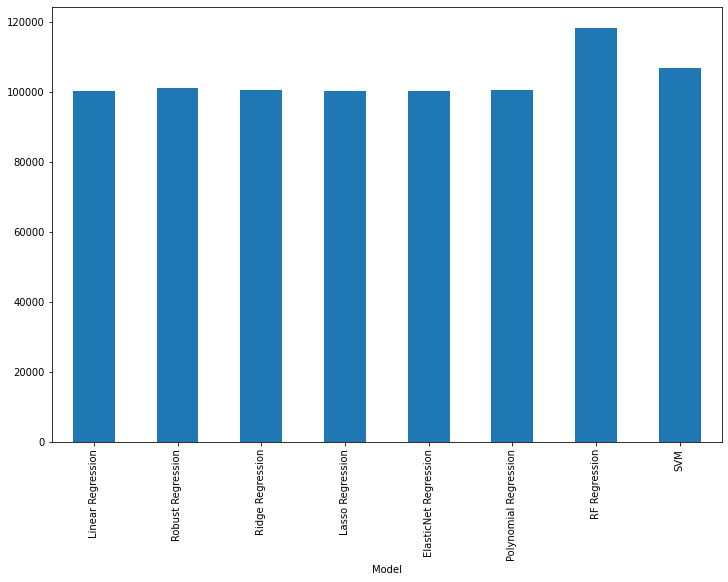

In [103]:
results_df['RMSE'].plot(kind='bar',figsize=(12,8))

In [104]:
results_df.describe()

,MAE,MSE,RMSE,R2 Square,Cross Validation
count,8.000000,8.000000e+00,8.000000,8.000000,8.000000
mean,83228.754005,1.076145e+10,103562.502708,0.912986,0.678074
std,4619.859782,1.403598e+09,6436.926608,0.011349,0.419084
min,80673.257669,1.005189e+10,100259.095842,0.886571,-0.000927
25%,80747.847067,1.005340e+10,100266.654324,0.914825,0.659826
50%,81009.811714,1.011179e+10,100557.370348,0.918239,0.896536
75%,82873.493415,1.053406e+10,102603.772535,0.918711,0.917559
max,93652.114092,1.402833e+10,118441.244457,0.918724,0.917559


As we can see From the Above Models Lasso Regression performed the best because it has Least Error Values.